## Import Lipraries :

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Load and Explore Dataset :

In [49]:
df = pd.read_csv("Dataset/StudentPerformanceFactors.csv")
print("First five rows of data:\n", df.head())
print("\nDataset info:\n")
print(df.info())

First five rows of data:
    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Q

## Visualize relationship between study hours and exam score :

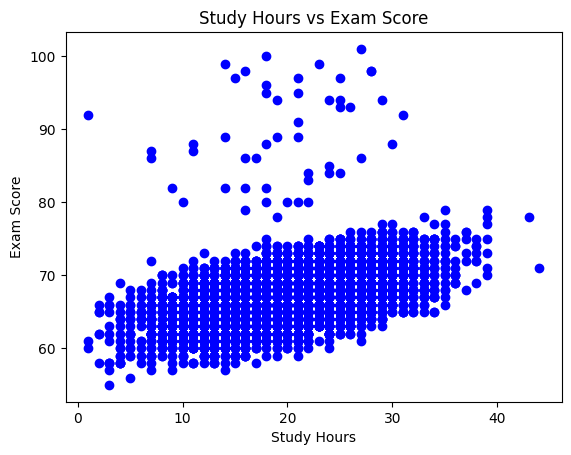

In [50]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

## Split the dataset into training and testing sets :

In [51]:
X = df[['Hours_Studied']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a linear regression model to predict final scores :

In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

## Evaluate Model performance :

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Performance:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Linear Regression Performance:
Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


## Visualize predictions :

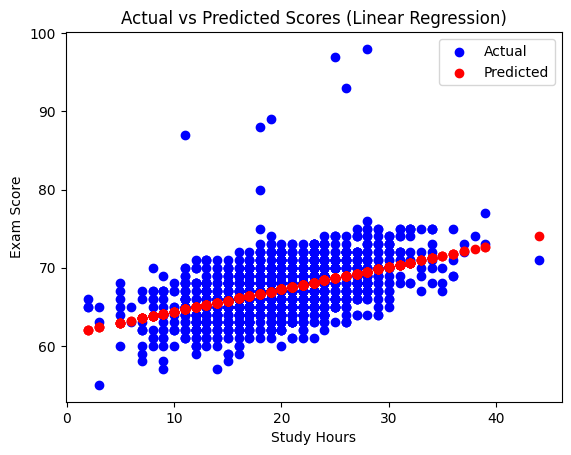

In [54]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted Scores (Linear Regression)")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

##  Polynomial Regression :

In [55]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

y_pred_p = poly_model.predict(X_test_p)

mse_poly = mean_squared_error(y_test_p, y_pred_p)
r2_poly = r2_score(y_test_p, y_pred_p)

print("\nPolynomial Regression Performance:")
print("Mean Squared Error:", mse_poly)
print("R² Score:", r2_poly)



Polynomial Regression Performance:
Mean Squared Error: 10.84498813570501
R² Score: 0.23276034442853466


## Visualize Polynomial Regression Predictions :

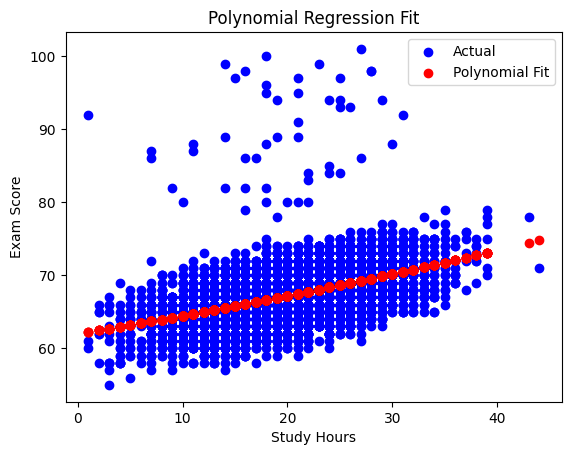

In [56]:
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, poly_model.predict(X_poly), color='red', label='Polynomial Fit')
plt.title("Polynomial Regression Fit")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

## Testing Model On User Inputs :

In [ ]:
hours = float(input("Enter number of study hours: "))
predicted_score = lr_model.predict([[hours]])
print(f"\nPredicted exam score for {hours} study hours: {predicted_score[0]:.2f}")


Predicted exam score for 30.0 study hours: 70.08


### Experiment with Multiple Features ('Hours_Studied', 'Sleep_Hours', 'Attendance')

In [41]:
X = df[['Hours_Studied', 'Sleep_Hours', 'Attendance']]
y = df['Exam_Score']

## Evaluate Multi-Feature Model Performance :

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 5.817839948697001
R²: 0.5884110279740731


## Visualize Model Predictions :

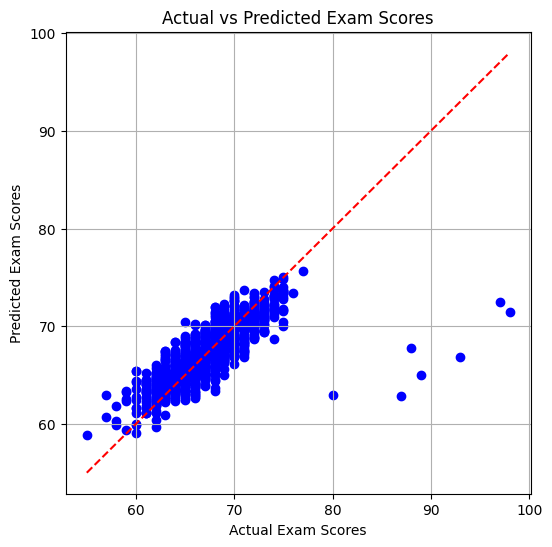

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.grid(True)
plt.show()

## Compare Actual vs Predicted Values :

In [44]:
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample of Actual vs Predicted Values:\n")
print(comparison.head(10))


Sample of Actual vs Predicted Values:

   Actual  Predicted
0      65  65.466428
1      65  66.044819
2      71  69.768472
3      64  67.070896
4      66  64.122040
5      66  67.341800
6      72  70.826706
7      66  69.200747
8      70  69.809964
9      70  68.775088


## Test the Multi-Feature Model on User Inputs :

In [45]:
hours = float(input("Enter number of study hours: "))
sleep = float(input("Enter number of sleep hours: "))
attendance = float(input("Enter attendance percentage: "))

test_data = pd.DataFrame({
    'Hours_Studied': [hours],
    'Sleep_Hours': [sleep],
    'Attendance': [attendance]
})

predicted_score = lr_model.predict(test_data)
print(f"\nPredicted exam score: {predicted_score[0]:.2f}")



Predicted exam score: 58.20
